# FLOWER CLASSIFICATION MODEL

We will train a model to classify images of flower into 5 classes. The classes are Daisy, Dandelion, Rose, Sunflower and Tulip. The dataset we will use is Kaggle dataset with nearly 4000 thousand images of these flowers.

## IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from keras import Input

## FETCHING IMAGE COUNT FROM DATASET

In [2]:
dirs = os.listdir("Images/")
count = 0
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images ')
    count = count + len(files)
print('Images Folder has total ' + str(count) + ' Images')

daisy Folder has 764 Images 
dandelion Folder has 1052 Images 
rose Folder has 784 Images 
sunflower Folder has 734 Images 
tulip Folder has 984 Images 
Images Folder has total 4318 Images


## LOADING IMAGES INTO ARRAYS AS DATSET

In [3]:
base_dir = 'Images/'
img_size = 180
batch = 32

## DEFINING TRAINING AND VALIDATION DATASET

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset = 'training',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset = 'validation',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

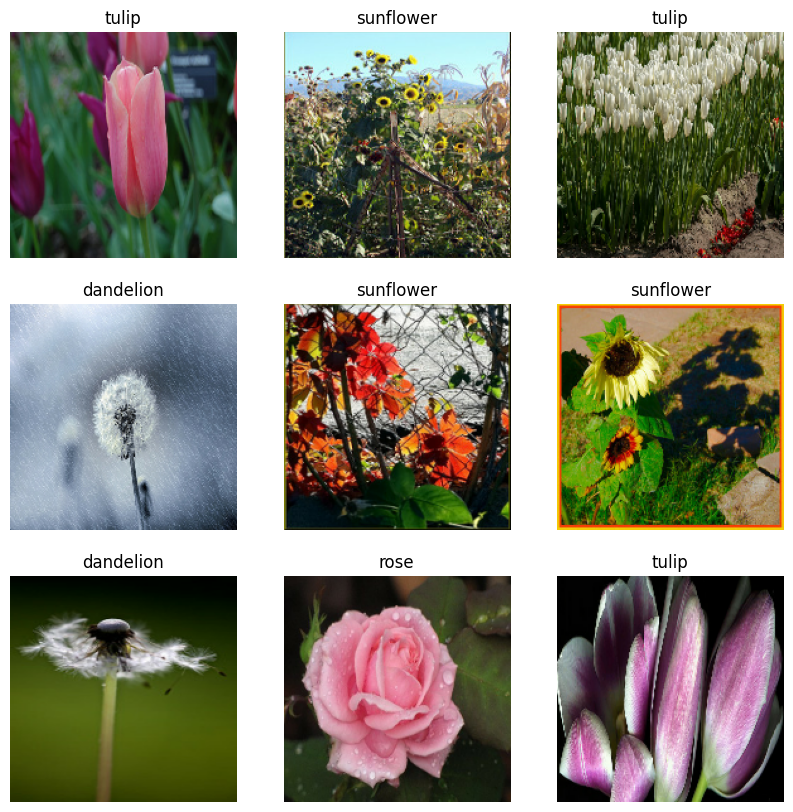

In [6]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

## BUILDING CACHE FOR TRAINING AND VALIDATION DATASET

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## DATA AUGUMENTATION TO AVOID OVERFITTING

In [8]:
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

## MODEL CREATION

In [9]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
])

In [10]:
model.add(tf.keras.layers.Conv2D(filters=16 , kernel_size = (3,3) , padding='Same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))

model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size = (3,3) , padding='Same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = (3,3) , padding='Same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense (units=128 , activation='relu'))
model.add(tf.keras.layers.Dense (units=5 , activation='softmax'))

## COMPILING THE MODEL

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

## TRAINING THE MODEL

In [14]:
history = model.fit (train_ds, validation_data=val_ds , epochs=15)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 569ms/step - accuracy: 0.3494 - loss: 1.5503 - val_accuracy: 0.5191 - val_loss: 1.1437
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 60s 487ms/step - accuracy: 0.5495 - loss: 1.1053 - val_accuracy: 0.6222 - val_loss: 1.0127
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 494ms/step - accuracy: 0.6065 - loss: 0.9878 - val_accuracy: 0.6222 - val_loss: 0.9739
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 54s 496ms/step - accuracy: 0.6386 - loss: 0.9354 - val_accuracy: 0.6535 - val_loss: 0.9011
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.6684 - loss: 0.8634 - val_accuracy: 0.6640 - val_loss: 0.8467
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 486ms/step - accuracy: 0.6679 - loss: 0.8413 - val_accuracy: 0.6721 - val_loss: 0.8380
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 493ms/step - accuracy: 0.7166 - loss: 0.7681 - val_accuracy: 0.6860 - val_loss: 0.8071
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 509ms/step - accuracy: 0.7065 - loss: 0

## FUNCTION FOR CLASSIFYING IMAGE USING MODEL

In [15]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [17]:
classify_images('sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


'The Image belongs to rose with a score of 35.774185'

## SAVING MODEL

In [18]:
model.save('Flower_Class_Model.keras')